# Project 1
 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#imprting of libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt  
import seaborn as sns; 
sns.set(color_codes=True)
from sklearn import preprocessing
import tensorflow as tf
import  sklearn.metrics


import warnings
warnings.filterwarnings("ignore")



In [3]:
#Dataset Acqusition
df = pd.read_csv('/content/drive/MyDrive/AIDI/1009/winequality-red.csv')


## 1. Exploratory Data Analysis EDA

In [4]:
# Checking the shape of the Data (Rows, COlumns)
df.shape

(1599, 12)

In [5]:
## Cheking the first 6 rows of the Acquired Data
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
## CHecking of the data values

print("\nfixed acitidity values \n",df['fixed acidity'].unique())
print("\nvolatile acidity values \n",df['volatile acidity'].unique())
print("\ncitric acid values \n",df['citric acid'].unique())
print("\nresidual sugar values \n",df['residual sugar'].unique())
print("\nchlorides values \n",df['chlorides'].unique())
print("\nfree sulfur dioxide values \n",df['free sulfur dioxide'].unique())
print("\ntotal sulfur dioxide values \n",df['total sulfur dioxide'].unique())
print("\ndensity values \n",df['density'].unique())
print("\npH\n",df['pH'].unique())
print("\nsulphates values \n",df['sulphates'].unique())
print("\nalcohol values \n",df['alcohol'].unique())
print("\nquality values \n",df['quality'].unique())


fixed acitidity values 
 [ 7.4  7.8 11.2  7.9  7.3  7.5  6.7  5.6  8.9  8.5  8.1  7.6  6.9  6.3
  7.1  8.3  5.2  5.7  8.8  6.8  4.6  7.7  8.7  6.4  6.6  8.6 10.2  7.
  7.2  9.3  8.   9.7  6.2  5.   4.7  8.4 10.1  9.4  9.   8.2  6.1  5.8
  9.2 11.5  5.4  9.6 12.8 11.  11.6 12.  15.  10.8 11.1 10.  12.5 11.8
 10.9 10.3 11.4  9.9 10.4 13.3 10.6  9.8 13.4 10.7 11.9 12.4 12.2 13.8
  9.1 13.5 10.5 12.6 14.  13.7  9.5 12.7 12.3 15.6  5.3 11.3 13.   6.5
 12.9 14.3 15.5 11.7 13.2 15.9 12.1  5.1  4.9  5.9  6.   5.5]

volatile acidity values 
 [0.7   0.88  0.76  0.28  0.66  0.6   0.65  0.58  0.5   0.615 0.61  0.62
 0.56  0.59  0.32  0.22  0.39  0.43  0.49  0.4   0.41  0.71  0.645 0.675
 0.685 0.655 0.605 0.38  1.13  0.45  0.67  0.52  0.935 0.29  0.31  0.51
 0.42  0.63  0.69  0.735 0.725 0.705 0.785 0.75  0.625 0.3   0.55  1.02
 0.775 0.9   0.545 0.575 0.33  0.54  1.07  0.695 1.33  0.745 1.04  0.715
 0.415 0.34  0.68  0.95  0.53  0.64  0.885 0.805 0.73  0.37  0.835 1.09
 0.57  0.44  0.635 0.82  0

In [7]:
# Information of the Data Frame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
# Description of the Data
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
## How many null values in the columns of the DataFrame

df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
## Chategorical and Continous Features
categorical_features = ['quality']
continuous_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

In [11]:
## Counting the number of instances of the classes

df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [12]:
mean_df=df.describe().loc['mean',:]
mean_df

fixed acidity            8.319637
volatile acidity         0.527821
citric acid              0.270976
residual sugar           2.538806
chlorides                0.087467
free sulfur dioxide     15.874922
total sulfur dioxide    46.467792
density                  0.996747
pH                       3.311113
sulphates                0.658149
alcohol                 10.422983
quality                  5.636023
Name: mean, dtype: float64

In [13]:
#Dataset Acqusition
df = pd.read_csv('/content/drive/MyDrive/AIDI/1009/winequality-red.csv')

X = df.iloc[:, 0:-1]
Y = df.iloc[:,-1]
print(X)
print("555555")
print(Y)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [14]:
## Evaluating the Correlaton

X.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595


Text(111.5, 0.5, 'Features')

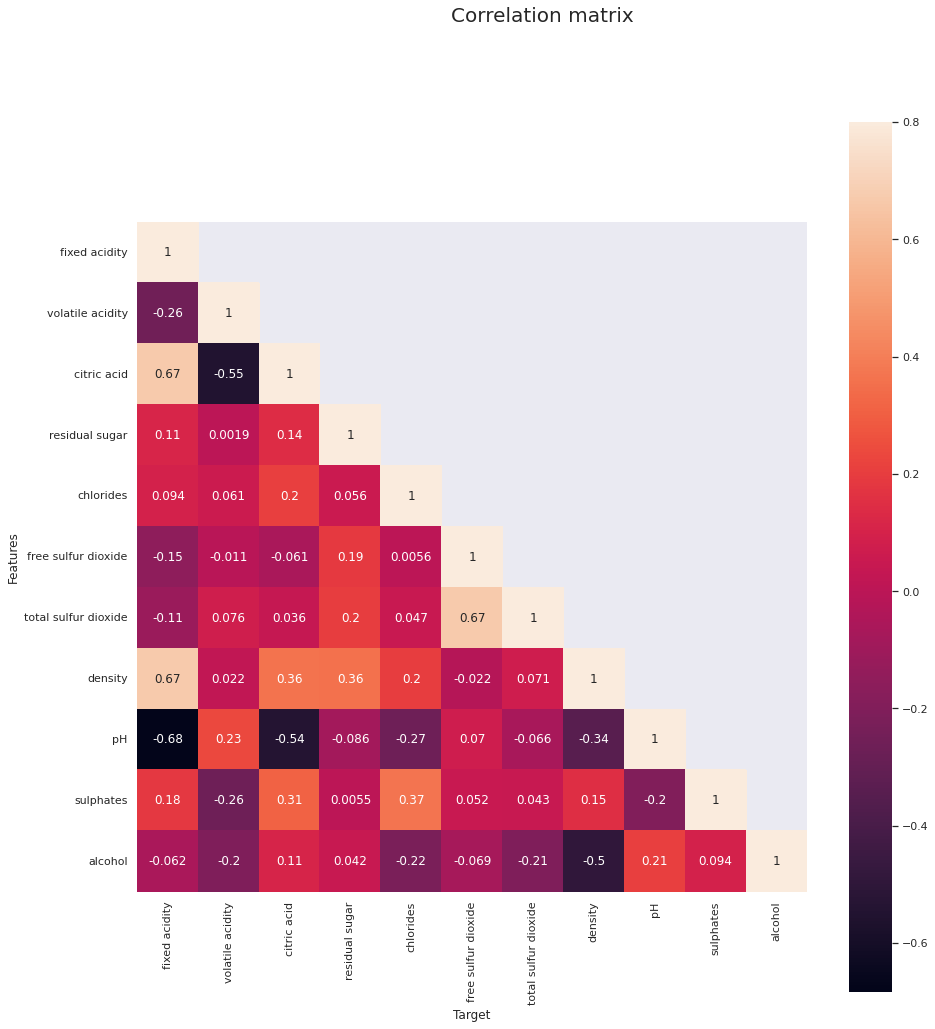

In [15]:
# Correlation analysis
corrMatt = X.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(15,16)
fig.suptitle('Correlation matrix', fontsize=20)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)
plt.xlabel('Target')
plt.ylabel('Features')



## 2. implement Feature Scaling to Normalize the data(compare the histogram/KDE for MinMaxScaler and StandardScaler

Text(0, 0.5, 'Observations')

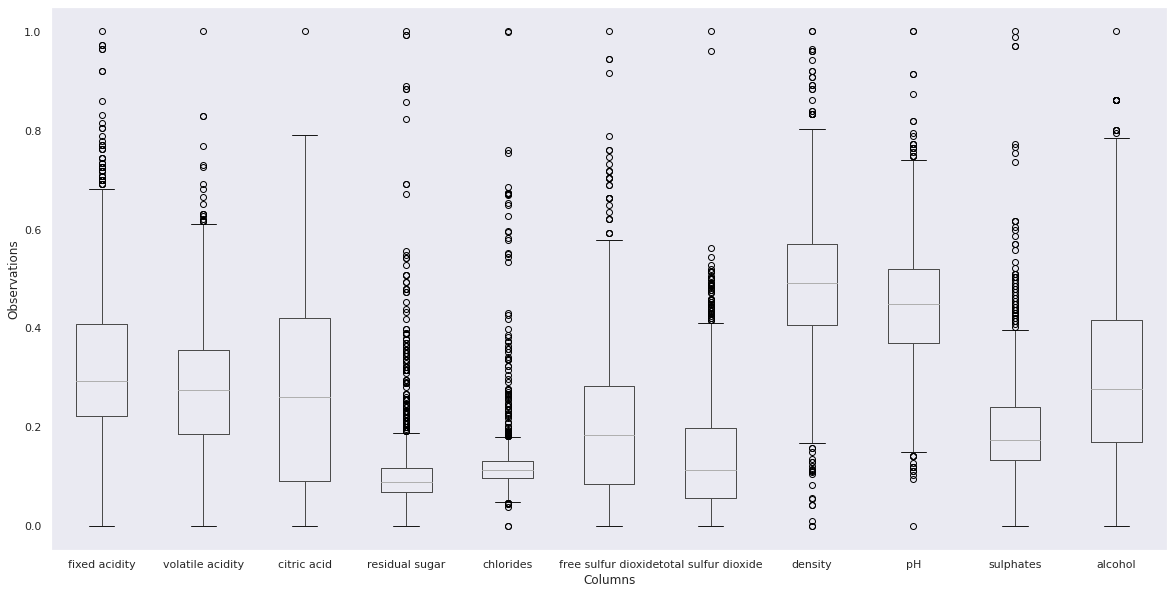

In [16]:
scaler = preprocessing.MinMaxScaler()
scaled = scaler.fit_transform(X)

X_scale = pd.DataFrame(scaled, columns = [name for name in list(X)])

fig = plt.figure(figsize = (20,10))
X_scale.boxplot(column=[name for name in list(X_scale)], grid=False)
plt.xlabel('Columns')
plt.ylabel('Observations')

In [17]:
X_scale.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846


In [18]:
X_scale.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.329171,0.279329,0.270976,0.112247,0.125988,0.209506,0.142996,0.490211,0.449695,0.196496,0.311228
std,0.154079,0.122644,0.194801,0.096570,0.078573,0.147326,0.116238,0.138571,0.121564,0.101501,0.163949
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.221239,0.184932,0.090000,0.068493,0.096828,0.084507,0.056537,0.406021,0.370079,0.131737,0.169231
50%,0.292035,0.273973,0.260000,0.089041,0.111853,0.183099,0.113074,0.490455,0.448819,0.173653,0.276923
75%,0.407080,0.356164,0.420000,0.116438,0.130217,0.281690,0.197880,0.570117,0.519685,0.239521,0.415385
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0.5, 1.0, 'Description of the Data')

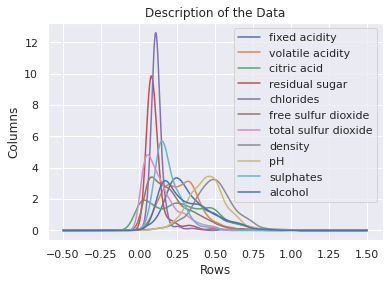

In [19]:
pd.DataFrame(X_scale).plot(kind='kde')
plt.xlabel('Rows')
plt.ylabel('Columns')
plt.title("Description of the Data")



Text(0.5, 1.0, 'Description of the Data')

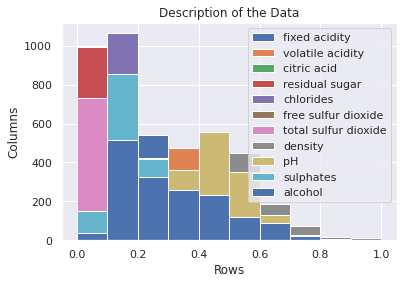

In [20]:

pd.DataFrame(X_scale).plot(kind='hist', bins=10)
plt.xlabel('Rows')
plt.ylabel('Columns')
plt.title("Description of the Data")

In [21]:
X_scale.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f541979e0d0>,
      dtype=object)

<Figure size 720x576 with 0 Axes>

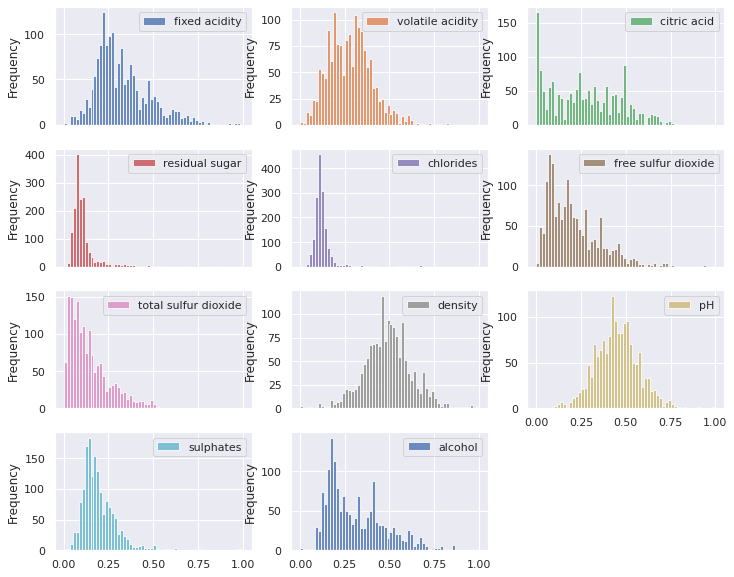

In [22]:
# Histogram
plt.figure(figsize=(10,8))
X_scale.plot(kind='hist', alpha=0.8,bins=60, xlabel = "4", ylabel = "s", subplots=True,layout=(4,3),legend=True,figsize=(12,10))

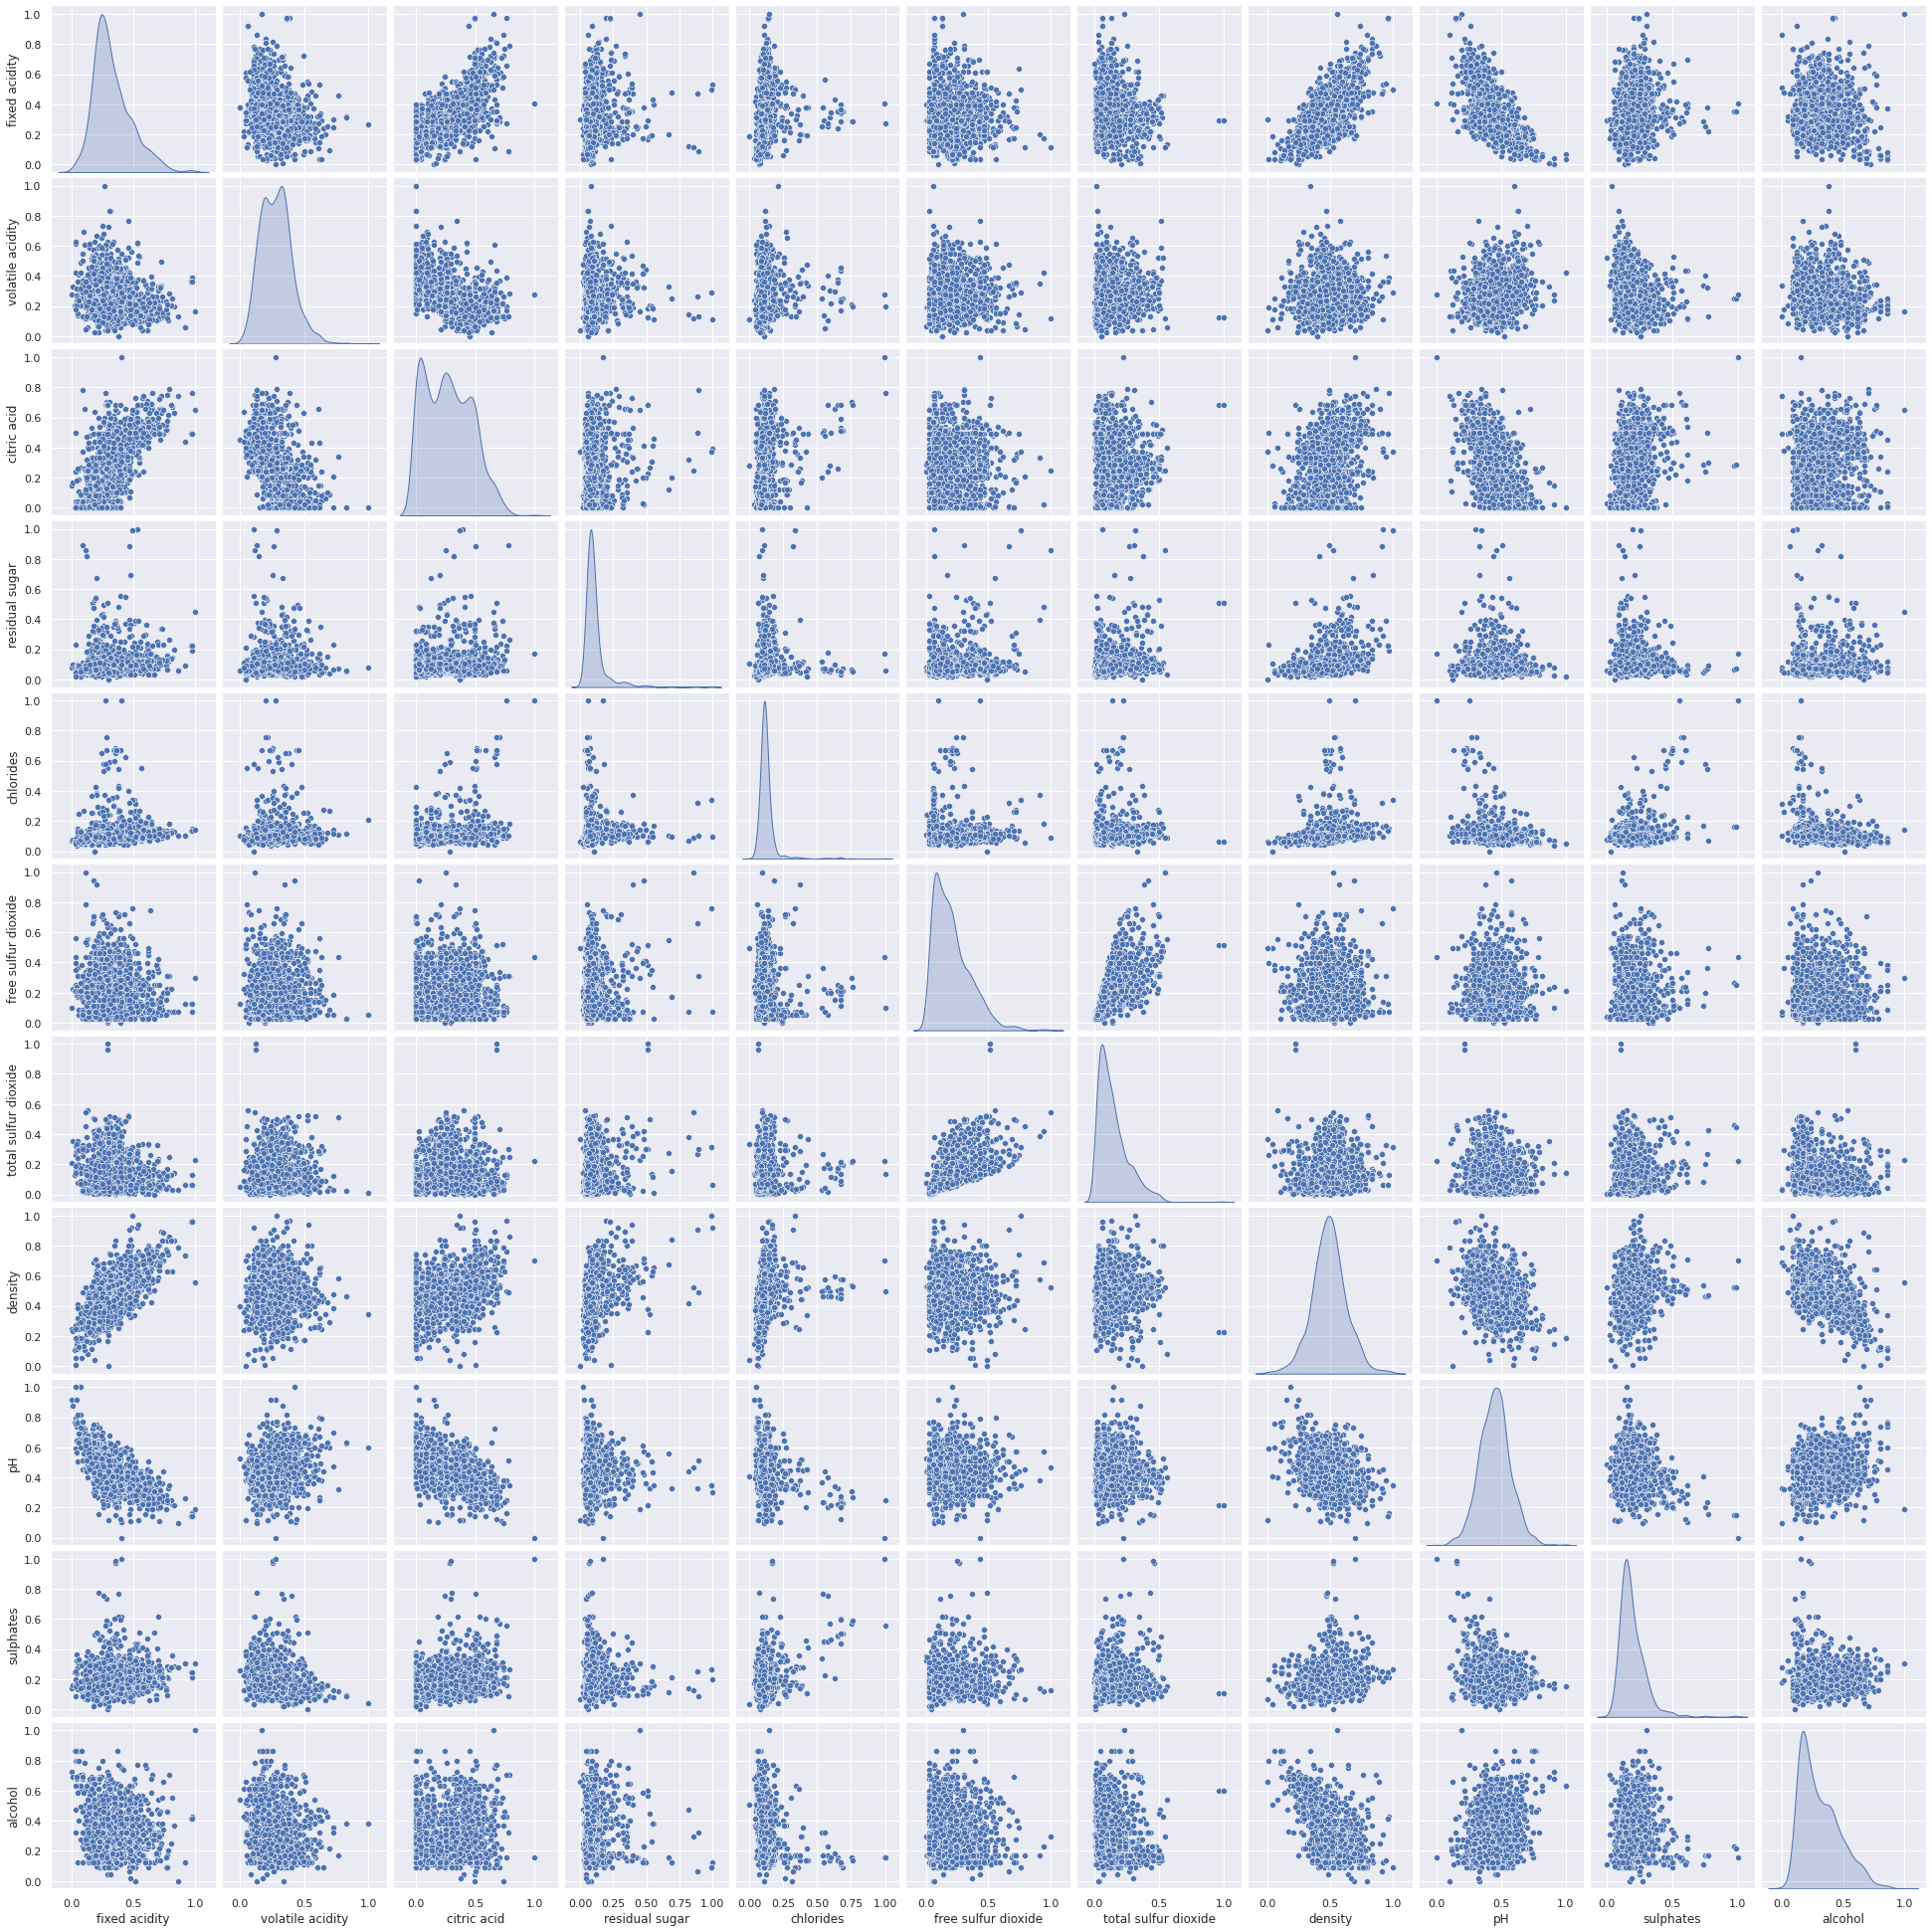

In [23]:
plot1=sns.pairplot(X_scale, diag_kind='kde')

In [24]:
#Dataset Acqusition
df = pd.read_csv('/content/drive/MyDrive/AIDI/1009/winequality-red.csv')
df 

# Scaling and Labeling of the Data
from sklearn.preprocessing import StandardScaler, LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df.iloc[: , -1])
y = pd.DataFrame(y.reshape(len(y),1))

## Splition of the Target and Features Data
features = df.drop(['quality'] , axis = 1)
target = df['quality']


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features,y, test_size = 0.2, random_state = 0)

from sklearn.preprocessing import StandardScaler, LabelEncoder

le = LabelEncoder()
y = le.fit_transform(df.iloc[: , -1])
y = pd.DataFrame(y.reshape(len(y),1))



import tensorflow as tf 
Y_train_cat = tf.keras.utils.to_categorical(y_train, 6)
Y_test_cat = tf.keras.utils.to_categorical(y_test, 6)
df.shape

(1599, 12)

##Q2: Implement a Neural Network using TF Estimator DNN Classifier

In [25]:
#Dataset Acqusition
df.columns = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides'
                , 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

## Creating Features and Target
features = df.drop(['quality'] , axis = 1)
target = df['quality']

# Scaling of the Data
from sklearn.preprocessing import StandardScaler, LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df.iloc[: , -1])
y = pd.DataFrame(y.reshape(len(y),1))

## Data splittion Training and Testing
x_train, x_test, y_train, y_test = train_test_split(features,y, test_size = 0.2, random_state = 0)
y_train_cat = tf.keras.utils.to_categorical(y_train, 6)
y_test_cat = tf.keras.utils.to_categorical(y_test, 6)


## Creating a feature of Matrix
def create_feature_column():
    feat_volatile_acidity = tf.feature_column.numeric_column('volatile_acidity')
    feat_residual_sugar = tf.feature_column.numeric_column('residual_sugar')
    feat_chlorides = tf.feature_column.numeric_column('chlorides')
    feat_total_sulfur_dioxide  = tf.feature_column.numeric_column('total_sulfur_dioxide')
    feat_density              = tf.feature_column.numeric_column('density')
    feat_pH  = tf.feature_column.numeric_column('pH')
    feat_sulphates  = tf.feature_column.numeric_column('sulphates')
    feat_alcohol  = tf.feature_column.numeric_column('alcohol')


    feature_column = [ feat_volatile_acidity,feat_residual_sugar, feat_chlorides, 
                       feat_total_sulfur_dioxide,feat_density,feat_pH,feat_sulphates,feat_alcohol] 

    return feature_column
feature_column = create_feature_column()

## Builing 
def traineval(x_train, y_train, training=False, batch_size=128):
    """An input function for training or evaluating"""
    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices((dict(x_train), y_train))

    # Shuffle and repeat if you are in training mode.
    if training:
        dataset = dataset.shuffle(1000).repeat()

    return dataset.batch(batch_size)

my_feature_columns = []
for key in df.keys():
    my_feature_columns.append(tf.feature_column.numeric_column(key=key))

dnn = tf.estimator.DNNClassifier(hidden_units = [6,6,3],
                                      feature_columns = feature_column,
                                      n_classes= 6,
                                      activation_fn=tf.nn.relu,
                                      dropout=None)
## Training a model
dnn.train(
    input_fn= lambda: traineval(x_train, y_train , training=True), steps=5000)

eval_result = dnn.evaluate(input_fn=lambda: traineval(x_test, y_test, training=False))
predictions = dnn.predict(input_fn=lambda: traineval(x_test, y_test, training=False))
print()
print(eval_result)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpi4d7imp8', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initiali

### Q3: Implement a Neural Network using TF.Keras <br> a. Plot training loss and validation loss <br> b. Plot training accuracy and validation accuracy


In [26]:
## Spliting the Data into Train and Test
x_train, x_test_x_val, y_train, y_test_y_val = train_test_split(features,y, test_size = 0.2, random_state = 0)
x_test, x_val, y_test, y_val = train_test_split(x_test_x_val,y_test_y_val, test_size = 0.2, random_state = 0)

y_train_cat = tf.keras.utils.to_categorical(y_train, 6)
y_test_cat = tf.keras.utils.to_categorical(y_test, 6)
y_val_cat = tf.keras.utils.to_categorical(y_val, 6)

In [27]:
## Building a model
Model = tf.keras.models.Sequential()
Model.add(tf.keras.layers.Input(shape = 11,))
Model.add(tf.keras.layers.Dense(units = 6 , activation = "relu" ))
Model.add(tf.keras.layers.Dense(units = 6 , activation = "relu" ))
Model.add(tf.keras.layers.Dense(units = 6 , activation = "sigmoid"))
Model.summary()
Model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' ,metrics= ['accuracy'])
history = Model.fit(x_train, y_train_cat,  batch_size= 128, epochs = 1250 , validation_data = (x_test,y_test_cat))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 6)                 42        
                                                                 
Total params: 156
Trainable params: 156
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1250
10/10 [==============================] - 1s 26ms/step - loss: 10.7496 - accuracy: 0.0328 - val_loss: 9.2329 - val_accuracy: 0.0312
Epoch 2/1250
10/10 [==============================] - 0s 6ms/step - loss: 9.3423 - accuracy: 0.0352 - val_loss: 7.9146 - val_accuracy: 0.0391
Epoch 3/1250
10/10 [================

In [28]:
## Evaluating of the model
Model.evaluate(x_test, y_test_cat)

8/8 [==============================] - 0s 2ms/step - loss: 0.9327 - accuracy: 0.6094


[0.9327026009559631, 0.609375]

### Visualisation 

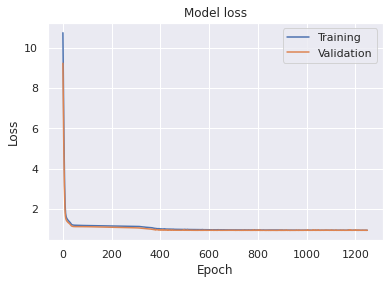

In [29]:
## Making a model of Loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

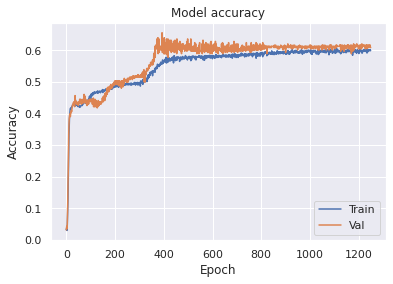

In [30]:
## Making a graph of Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

4. Provide observations/reasoning where necessary and a conclusion section at the end of the notebook.

In the experiement, Data set from the Kaggle is downloaded. Some of the EDA methods are applied and the dataset is processed and labelled. 
These proceesed data are plotted and visualuised using pair wise plot, Histogram and the bar plot. 

After making the processed data, we are ready for the Neural network modeling.
In the first modeling, a matrix of the features is created. the the model is builed as well as the training and the evaluation of the model.
THe estimator model make an accuracy of more than 60 percetile. 

Similalry, the third model has the 11 number of neurons, and it has 2 hidden layers and a hidden layers. The hidden layers has the relu activation function and the hidden layer has the sigmoid function. 

The model compilation has the adam as the optimzation function and the loss we have categorical_crossentrophy and the metrics is accuracy. 
Then the model is getting fit over the dataset using the above functions and the optimizers. 1250 are the epochs and the 128 is the batch size. 
Multiple of the epochs is selected for the best of the accuracy. and we got the best score of the accuracy. 



